In [33]:
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
# Load a CSV File containing data on the market share of the American Smartphone Market from 2016-2024
df = pd.read_csv('/Users/vinaymadhugiri/Desktop/Data Science Bootcamp/stock-Analysis_t2/us_smartphone_market_16_24.csv')

# Remove any unnecessary columns
df_clean = df.drop(columns=['Unnamed: 11']).iloc[:-1]

print(df_clean.head())

  Quarter  Apple  Samsung  LG  Motorola/Lenovo  ZTE  Other  Alcatel  OnePlus  \
0  Q1 '16     33       29  14                0    7     17        0        0   
1  Q2 '16     30       30  14                0    9     17        0        0   
2  Q3 '16     34       26  13                0    8     19        0        0   
3  Q4 '16     39       20  12                0   10     19        0        0   
4  Q1 '17     33       23  18                0   10     16        0        0   

   hmd  Google  
0    0       0  
1    0       0  
2    0       0  
3    0       0  
4    0       0  


In [35]:
# Convert the 'Quarter' column into a more usable format (Period for quarters)
def convert_quarter_to_date(quarter_str):
    year = int(quarter_str.split("'")[1])
    quarter = int(quarter_str.split("'")[0].strip()[-1])
    return pd.Period(year=2000 + year, freq='Q')

df_clean['Quarter'] = df_clean['Quarter'].apply(convert_quarter_to_date)

In [36]:
# Filter the data for the two periods: Q1 2017 - Q4 2019 and Q1 2021 - Q4 2023
mask_17_19 = (df_clean['Quarter'] >= pd.Period('2017Q1')) & (df_clean['Quarter'] <= pd.Period('2019Q4'))
mask_21_23 = (df_clean['Quarter'] >= pd.Period('2021Q1')) & (df_clean['Quarter'] <= pd.Period('2023Q4'))

In [37]:
# Calculate the average market share for each company during these periods
avg_17_19 = df_clean[mask_17_19].drop(columns=['Quarter']).mean()
avg_21_23 = df_clean[mask_21_23].drop(columns=['Quarter']).mean()

In [38]:
# Print the results
print("Average market share between Q1 2017 and Q4 2019:")
print(avg_17_19)

print("\nAverage market share between Q1 2021 and Q4 2023:")
print(avg_21_23)

Average market share between Q1 2017 and Q4 2019:
Apple              39.583333
Samsung            24.250000
LG                 14.000000
Motorola/Lenovo     3.250000
ZTE                 4.416667
Other              13.166667
Alcatel             1.333333
OnePlus             0.000000
hmd                 0.000000
Google              0.000000
dtype: float64

Average market share between Q1 2021 and Q4 2023:
Apple              53.166667
Samsung            24.916667
LG                  0.833333
Motorola/Lenovo     7.500000
ZTE                 0.000000
Other               9.916667
Alcatel             0.000000
OnePlus             0.666667
hmd                 0.666667
Google              1.666667
dtype: float64


In [57]:
# Data for the first period (Q1 2017 - Q4 2019)
labels = avg_17_19.index
sizes_17_19 = avg_17_19.values

# Data for the second period (Q1 2021 - Q4 2023)
sizes_21_23 = avg_21_23.values

# Function to combine small slices into "Other"
def combine_small_slices(labels, sizes, threshold=1):
    new_labels = []
    new_sizes = []
    other_size = 0
    
    for label, size in zip(labels, sizes):
        if size < threshold:
            other_size += size
        else:
            new_labels.append(label)
            new_sizes.append(size)
    
    if other_size > 0:
        new_labels.append('Other')
        new_sizes.append(other_size)
    
    return new_labels, new_sizes

# Combine small slices for decluttering
labels_17_19, sizes_17_19 = combine_small_slices(avg_17_19.index, avg_17_19.values)
labels_21_23, sizes_21_23 = combine_small_slices(avg_21_23.index, avg_21_23.values)

# Define a limited color palette
colors = plt.get_cmap('tab10').colors

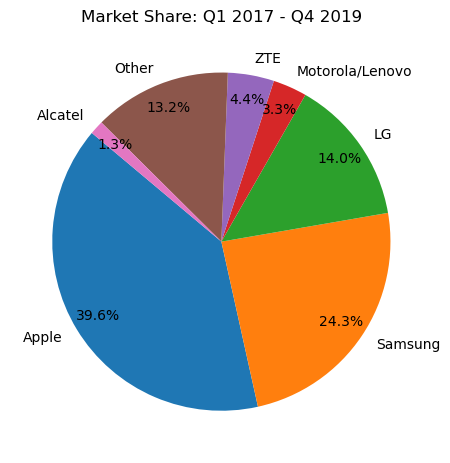

In [59]:
# Plotting pie chart for Q1 2017 - Q4 2019
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(sizes_17_19, labels=labels_17_19, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)
plt.title('Market Share: Q1 2017 - Q4 2019')
plt.savefig('Q1_17toQ4_19.png')
plt.show()

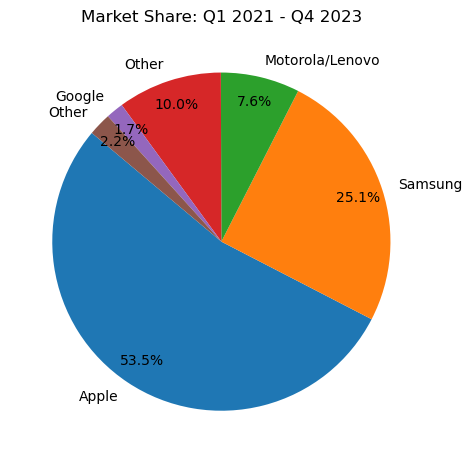

In [61]:
# Plotting pie chart for Q1 2021 - Q4 2023
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.pie(sizes_21_23, labels=labels_21_23, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)
plt.title('Market Share: Q1 2021 - Q4 2023')
plt.savefig('Q1_21toQ4_23.png')
plt.show()

In [42]:
# Filter the data for the period Q1 2017 - Q4 2023
mask = (df_clean['Quarter'] >= pd.Period('2017Q1')) & (df_clean['Quarter'] <= pd.Period('2023Q4'))
df_filtered = df_clean[mask]

In [43]:

# Set the 'Quarter' column as the index for plotting
df_filtered.set_index('Quarter', inplace=True)


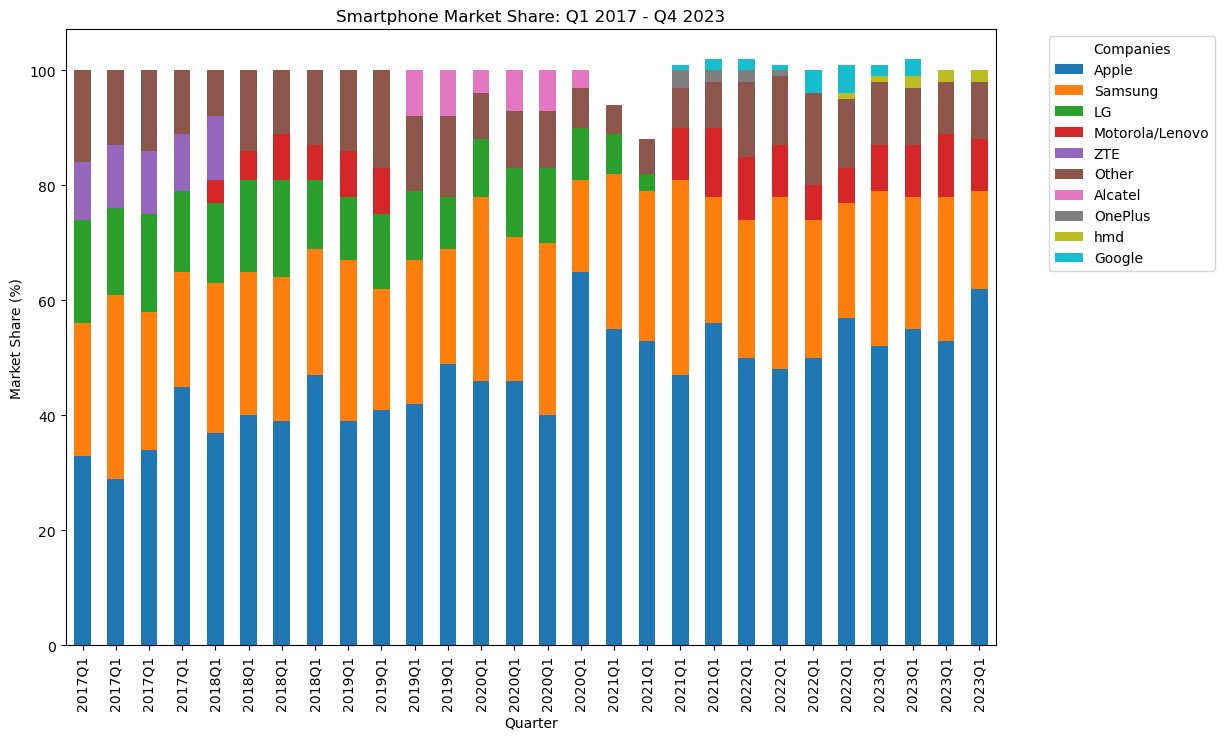

In [55]:
# Plot a stacked bar chart
df_filtered.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.title('Smartphone Market Share: Q1 2017 - Q4 2023')
plt.ylabel('Market Share (%)')
plt.xlabel('Quarter')
plt.legend(title='Companies', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Marketshare17_23.png')
plt.show()